In [12]:
import pandas as pd
import numpy as np

%matplotlib inline 

In [14]:
import os
os.getcwd()

'C:\\Users\\yas88\\Desktop\\Data science with python\\2. Numpy & pandas'

In [16]:
# excel, csv, text, json, sql
df = pd.read_csv('titanic.csv',delimiter = '\t' )
# df = pd.read_csv(r'C:\Users\Dralls\Desktop\titanic.csv', delimiter = '\t' )

#  sep = '\t'

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.groupby(['Sex','Survived'])['Age'].mean()

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
# Treating Null values
df['Embarked'].fillna(df.Embarked.mode()[0], inplace = True)
df['Age'].fillna(df.Age.mean(), inplace = True)

In [ ]:
# df.drop('Cabin',axis=1, inplace=True)

In [ ]:
df.columns

In [ ]:
# df.dropna(inplace = True) # to drop Null values


In [ ]:
df.info()

In [ ]:
# Categorical Data --->  Number form ---> DUMMY MAKING  ---> MODEL
pd.get_dummies(df.Embarked, drop_first=True)  # n-1  --  01 , 00, 10

In [ ]:
q1= pd.get_dummies(df.Sex,drop_first=True)

In [ ]:
df['coded'] = df.Sex.apply(lambda x: 1 if x=='female' else 0)

In [ ]:
pd.concat([df,q1,],1).head(2)

In [ ]:
a = np.where(df.Sex=='female')
df.Sex.iloc[a] = 1

In [ ]:
df.Sex = np.where(df.Sex=='male',0,1)
df.head()

In [ ]:
df2 = pd.get_dummies(df, columns=['Sex','Embarked'], drop_first=True)
df2.head()

# 3 ---> 2
# 5 --> 4
# 2 --> 1

In [ ]:
df.groupby('Survived')['Sex'].value_counts()

In [ ]:
df.describe()

In [ ]:
df.describe()[['Age','Fare']].plot(kind = 'barh')

# kind = 'bar', 'hist', 'barh'

In [ ]:
df['Fare'].plot(kind = 'hist')

In [ ]:
df.describe(include = 'O')

In [ ]:
df.Embarked.value_counts().plot(kind = 'pie')

In [ ]:
df.Sex.map({'female':0, 'male':1}).head()

In [ ]:
df.Sex.replace({'female':0, 'male': 1}).head()

In [ ]:
df.Sex.apply(lambda x: 0 if x == 'female' else 1).head()

In [19]:
df.Sex.value_counts()
df.Sex.value_counts(normalize = True)


male      0.641026
female    0.358974
Name: Sex, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


In [ ]:
df.Cabin.isna().sum() # number of Null values

125

In [ ]:
df.Cabin.isna().sum()/len(df)*100 # Null percentage Value

80.12820512820514

In [ ]:
df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked'],drop_first =True)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,"Pears, Mrs. Thomas (Edith Wearne)",22.0,1,0,113776,66.6000,C2,0,0,0,0,1
152,153,0,"Meo, Mr. Alfonzo",55.5,0,0,A.5. 11206,8.0500,NaN,0,1,1,0,1
153,154,0,"van Billiard, Mr. Austin Blyler",40.5,0,2,A/5. 851,14.5000,NaN,0,1,1,0,1
154,155,0,"Olsen, Mr. Ole Martin",NaN,0,0,Fa 265302,7.3125,NaN,0,1,1,0,1


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'female', 'male'],
      dtype='object')

In [ ]:
df.Embarked.fillna('S',inplace = True)
df.Embarked.isna().sum()


df.Age.fillna(df.Age.mean(),inplace = True)
df.Age.isnull().sum()



0

In [ ]:
a = df.Embarked.isna().astype(int)
a.apply(lambda x: 'S' if x == 1 else x)

a2 = df.Embarked.isna()
a2.apply(lambda x: 'S' if x == True else x)

0      0
1      0
2      0
3      0
4      0
      ..
151    0
152    0
153    0
154    0
155    0
Name: Embarked, Length: 156, dtype: int32

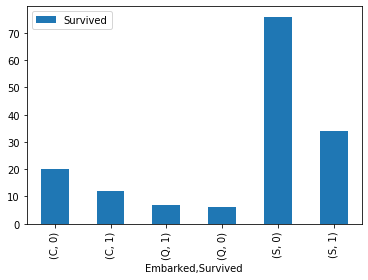

In [ ]:
df.groupby(['Embarked']).Survived.value_counts().to_frame().plot(kind = 'bar')

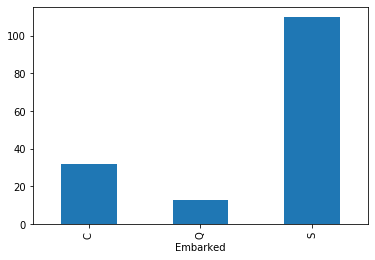

In [ ]:
df.groupby(['Embarked']).Survived.count().plot(kind = 'bar');

In [ ]:
df.drop(['Name','Sex','Ticket','SibSp','Parch','PassengerId'],1,inplace = True)

In [ ]:
df.head()

,Survived,Pclass,Ticket,Fare,Embarked
0,0,3,A/5 21171,7.2500,S
1,1,1,PC 17599,71.2833,C
2,1,3,STON/O2. 3101282,7.9250,S
3,1,1,113803,53.1000,S
4,0,3,373450,8.0500,S


In [ ]:
df2 = df.copy()

In [ ]:
1df['Embarked_2'] =  df.Embarked.replace(np.nan,'S')